# Distributions and Sampling in PyTorch

In [1]:
import matplotlib.pyplot as plt
import torch
import torch.distributions as dist

## Distribution definitions

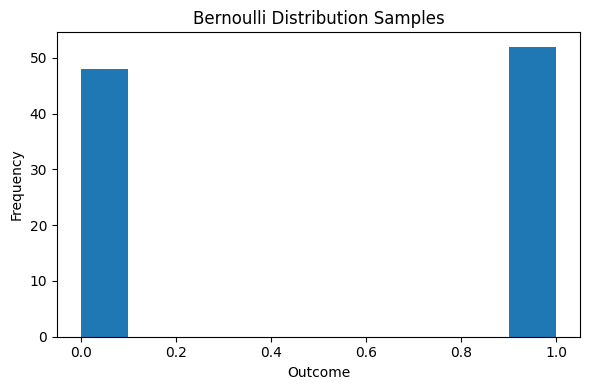

In [3]:
# Define a Bernoulli distribution for coin tossing
# Let's assume a fair coin, so p=0.5
bernoulli_distribution = dist.Bernoulli(torch.tensor([0.5]))

# Plotting the samples
fig, ax = plt.subplots(1, 1, figsize=(6, 4))

# Sampling from the Bernoulli distribution
bernoulli_samples = bernoulli_distribution.sample((100,))

# Bernoulli samples histogram
ax.hist(bernoulli_samples.numpy())
ax.set_title("Bernoulli Distribution Samples")
ax.set_xlabel("Outcome")
ax.set_ylabel("Frequency")

plt.tight_layout()
plt.show()

## Sampling is biased

In [4]:
# We can see that the samples are always biased.
# The more samples we take, the less visible the bias is.

for n in [10, 100, 1000, 10000]:
    bernoulli_samples = bernoulli_distribution.sample((n,))
    print(f"Frequency of heads in {n} samples:", torch.mean(bernoulli_samples).item())

# compute the nuumber of heads in the 1000 Bernoulli samples
bernoulli_samples = bernoulli_distribution.sample((1000,))

print("Number of heads:", torch.sum(bernoulli_samples).item())
print("Frequency of heads:", torch.mean(bernoulli_samples).item())

Frequency of heads in 10 samples: 0.6000000238418579
Frequency of heads in 100 samples: 0.4300000071525574
Frequency of heads in 1000 samples: 0.49900001287460327
Frequency of heads in 10000 samples: 0.4934999942779541
Number of heads: 485.0
Frequency of heads: 0.48500001430511475


## Gaussian Sampling

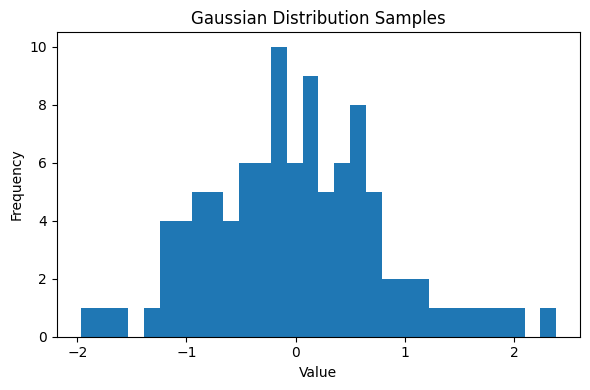

Mean of Gaussian samples: -0.0005291080451570451
Mean of 10 Gaussian samples: 0.13584434986114502
Mean of 100 Gaussian samples: -0.08476006239652634
Mean of 1000 Gaussian samples: 0.006369488313794136
Mean of 10000 Gaussian samples: -0.0018494927790015936


In [6]:
# For simplicity, let's assume a standard normal distribution with mean=0 and std=1
gaussian_distribution = dist.Normal(torch.tensor([0.0]), torch.tensor([1.0]))

# Plotting the samples
fig, ax = plt.subplots(1, 1, figsize=(6, 4))

# Sampling from the Gaussian distribution
gaussian_samples = gaussian_distribution.sample((100,))

# Gaussian samples histogram
ax.hist(gaussian_samples.numpy(), bins=30)
ax.set_title("Gaussian Distribution Samples")
ax.set_xlabel("Value")
ax.set_ylabel("Frequency")

plt.tight_layout()
plt.show()

# compute the mean of the 1000 Gaussian samples
print("Mean of Gaussian samples:", torch.mean(gaussian_samples).item())

for n in [10, 100, 1000, 10000]:
    gaussian_samples = gaussian_distribution.sample((n,))
    print(f"Mean of {n} Gaussian samples:", torch.mean(gaussian_samples).item())


## Probability Density Function (PDF)

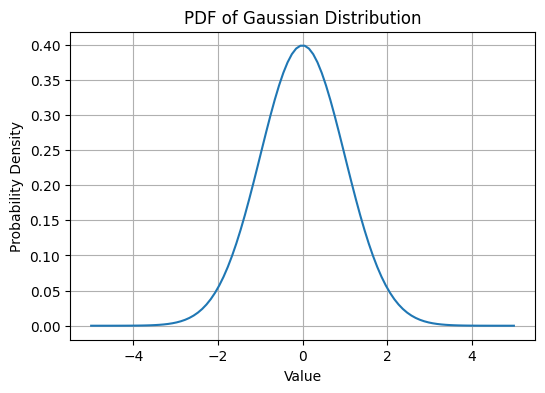

In [7]:
# Probability Density Function (PDF) values for Gaussian Distribution at different points
x_values = torch.linspace(-5, 5, 100)
pdf_values = torch.exp(gaussian_distribution.log_prob(x_values))

# Plotting PDF of Gaussian Distribution
plt.figure(figsize=(6, 4))
plt.plot(x_values.numpy(), pdf_values.numpy())
plt.title("PDF of Gaussian Distribution")
plt.xlabel("Value")
plt.ylabel("Probability Density")
plt.grid(True)
plt.show()